In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage


def get_driving_log():
    base_path = '../CarND-Behavioral-Cloning-P3-data_from_udacity/data/'

    def correct_path(path):
        filename = path.split('/')[-1]
        return base_path + 'IMG/' + filename

    def correct_path_in_column(df, column):
        df[column] = df[column].map(correct_path)

    df = pd.read_csv(base_path + 'driving_log.csv')
    correct_path_in_column(df, 'center')
    correct_path_in_column(df, 'left')
    correct_path_in_column(df, 'right')
    return df


def get_images_and_measurements(size):
    df = get_driving_log()[:size]
    return pd.DataFrame(
        {'image': df['center'].map(ndimage.imread).values,
         'measurement': df['steering'].values})


def get_data(df, column):
    return np.array(df[column].values.tolist())


print('get_images_and_measurements ...')
images_measurements = get_images_and_measurements(8036)
print('... get_images_and_measurements')
X_train = get_data(images_measurements, 'image')
y_train = get_data(images_measurements, 'measurement')

get_images_and_measurements ...
... get_images_and_measurements


In [2]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

(160, 320, 3)


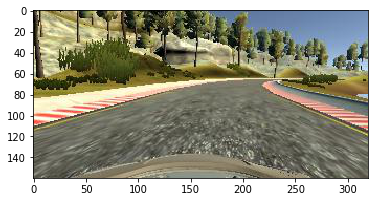

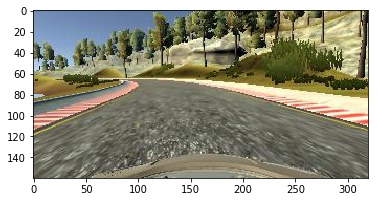

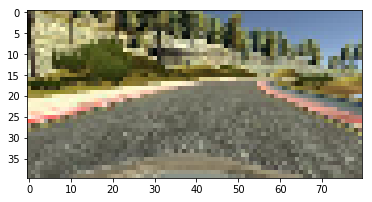

In [4]:
import cv2

image = X_train[1100]
print(image.shape)
plt.imshow(image)
plt.show()

image_flipped = np.fliplr(image)
plt.imshow(image_flipped)
plt.show()

image = cv2.resize(image, dsize = None, fx = 1/4, fy = 1/4)
plt.imshow(image)
plt.show()